# **Mean Squared Error (MSE) or Cost Function**  

**Mean Squared Error (MSE)** is a widely used metric for evaluating the performance of regression models. It measures the average squared difference between actual and predicted values.  

![Screenshot](Screenshot_124.png)


#### where 
- n = total number of observations
- yi = actual value
- ypredicted = predicted value


![Screenshot](Screenshot_125.png)


#### ypredicted replaced with "mxi + b"
 for y = mx + b  

# **Gradient Descent**

Gradient Descent is the algorithm that finds the best fit line for the given training data set

![Screenshot](Screenshot_126.png)


- m = m - learning rate * d/dx
- n = n - learning rate * d/dy

# Gradient Descent and Cost Function

 This notebook demonstrates the implementation of the gradient descent algorithm to find the optimal values of the slope (m) and intercept (b) for a linear regression model. The goal is to minimize the cost function, which measures the error between the predicted and actual values.

## Steps Involved:

1. **Import Required Libraries**: We use the `numpy` library for numerical operations.
2. **Define the Gradient Descent Function**: This function takes the input features (x) and target values (y) and iteratively updates the slope (m) and intercept (b) to minimize the cost function.
3. **Initialize Parameters**: We start with initial values of m and b set to 0.
4. **Set Hyperparameters**: We define the number of iterations and the learning rate.
5. **Iterative Optimization**: In each iteration, we:
   - Calculate the predicted values using the current m and b.
   - Compute the cost function, which is the mean squared error between the predicted and actual values.
   - Calculate the gradients of the cost function with respect to m and b.
   - Update m and b using the gradients and the learning rate.
6. **Print Results**: After each iteration, we print the current values of m, b, the cost, and the iteration number.

## Example:

We use a simple dataset with input features `x = [1, 2, 3, 4, 5]` and target values `y = [5, 7, 9, 11, 13]`. The gradient descent function is called with these values to find the optimal m and b.

By the end of the iterations, the algorithm converges to values of m and b that minimize the cost function, providing the best fit line for the given data.

In [1]:
import numpy as np

def gradient_descent(x,y):
    m_curr = b_curr = 0
    iterations = 1000
    n = len(x)
    learning_rate = 0.08
    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n) * sum([val ** 2 for val in (y - y_predicted)])
    
        md = -(2/n) * sum(x*(y-y_predicted))
        bd = -(2/n) * sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd

        if i % 100 == 0:
            print("m {}, b {}, cost{}, iteration {}".format(m_curr,b_curr,cost, i))




x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

gradient_descent(x,y)


m 4.96, b 1.44, cost89.0, iteration 0
m 2.0394796405287705, b 2.8575764123702467, cost0.003900706759494166, iteration 100
m 2.00254223474622, b 2.9908217272558963, cost1.619764814815573e-05, iteration 200
m 2.000163821401975, b 2.9994085527586343, cost6.72608040186699e-08, iteration 300
m 2.000010556639356, b 2.9999618871823226, cost2.7930077970132387e-10, iteration 400
m 2.0000006802690806, b 2.999997544012771, cost1.1597976963969667e-12, iteration 500
m 2.000000043836491, b 2.9999998417363587, cost4.816065007297071e-15, iteration 600
m 2.000000002824821, b 2.999999989801503, cost1.9998729419109415e-17, iteration 700
m 2.0000000001820313, b 2.9999999993428093, cost8.304485436369195e-20, iteration 800
m 2.0000000000117297, b 2.9999999999576503, cost3.4484605325891537e-22, iteration 900


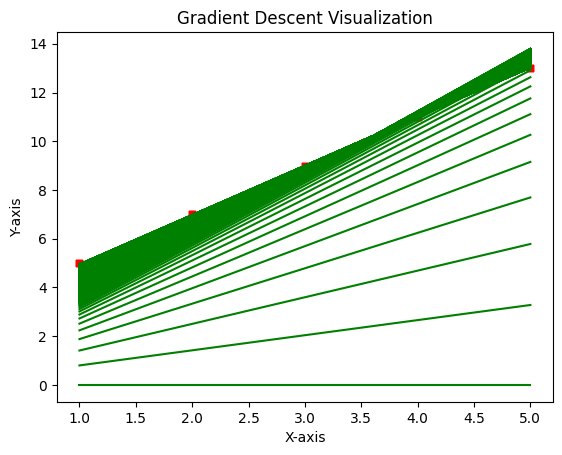

Final m: 2.021281045682893, Final b: 2.923168672645527


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(x, y):
    m_curr = b_curr = 0  # Initialize parameters
    rate = 0.01  # Learning rate
    n = len(x)

    plt.scatter(x, y, color='red', marker='+', linewidth=5)  # Plot data points

    for i in range(1000):  # 10,000 is too high for visualization
        y_predicted = m_curr * x + b_curr
        
        # Compute gradients
        md = -(2/n) * sum(x * (y - y_predicted))
        bd = -(2/n) * sum(y - y_predicted)
        
        # Update parameters
        m_curr -= rate * md
        b_curr -= rate * bd
        
        #plot the line
        plt.plot(x, y_predicted, color='green')
    
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Gradient Descent Visualization")
    plt.show()
    
    return m_curr, b_curr  # Return final values

# Sample Data
x = np.array([1, 2, 3, 4, 5])
y = np.array([5, 7, 9, 11, 13])

# Run the function
final_m, final_b = gradient_descent(x, y)
print(f"Final m: {final_m}, Final b: {final_b}")


#### Exercise

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv('test_scores.csv')
df

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83
5,aamir,49,52
6,venkat,65,66
7,virat,35,30
8,arthur,66,68
9,paul,67,73


In [5]:
def linear_reg(x,y):
    r = LinearRegression()
    x = x.reshape(-1,1)  # Reshape x to a 2D array of dimension (n,1)
    r.fit(x,y)
    return r.coef_,r.intercept_
    
    

def gradient_descent(x,y):
    m_curr = b_curr = 0
    n = len(x)
    lrate = 0.0001
    cost_prev = 0

    for i in range(1000):
        y_predicted = m_curr * x + b_curr
        cost = (1/n) * sum([ val ** 2 for val in (y - y_predicted)])

        md = -(2/n) * sum(x * (y - y_predicted))
        bd = -(2/n) * sum(y - y_predicted)

        m_curr = m_curr - lrate * md
        b_curr = b_curr - lrate * bd
        if math.isclose(cost, cost_prev, rel_tol=1e-20):
            break
        cost_prev = cost

        if i % 100 == 0:
            print(f"Cost = {cost}, m = {m_curr} , b = {b_curr}")

    return m_curr,b_curr



if __name__ == "__main__": # This is to prevent the code from running when importing the module
    x = np.array(df.math)
    y = np.array(df.cs)
    
    m,b =  gradient_descent(x,y)
    print(f"Using gradient descent function : coef = {m} , interceptt = {b} ")

    m,b = linear_reg(x,y)
    
    print(f"Using linear regression model : coef = {m}, intercept = {b}")
    

Cost = 5199.1, m = 0.9891800000000002 , b = 0.013980000000000001
Cost = 31.81137619555294, m = 1.0445225676937555 , b = 0.01694164562385224
Cost = 31.810901820768137, m = 1.0444918373600534 , b = 0.019119424605773216
Cost = 31.81042853380193, m = 1.0444611422814014 , b = 0.021294705153782113
Cost = 31.80995633215975, m = 1.044430482417354 , b = 0.023467490134180848
Cost = 31.809485213352726, m = 1.0443998577275115 , b = 0.02563778240998294
Cost = 31.809015174897805, m = 1.0443692681715206 , b = 0.02780558484091739
Cost = 31.808546214317488, m = 1.0443387137090745 , b = 0.029970900283432418
Cost = 31.808078329140137, m = 1.0443081942999124 , b = 0.03213373159069919
Cost = 31.807611516899584, m = 1.0442777099038196 , b = 0.0342940816126156
Using gradient descent function : coef = 1.0442475648018756 , interceptt = 0.03643038673891087 
Using linear regression model : coef = [1.01773624], intercept = 1.9152193111568891
